# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [99]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [100]:
# put your answer here
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [101]:
# put your answer here
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [102]:
# put your answer here
df.shape

(48895, 16)

Identify the numerical features:

In [103]:
# put your answer here
numeric_df = df.select_dtypes(include=np.number)
numeric_df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Identify the categorical features

In [104]:
# put your answer here
categorical_df = df.select_dtypes(exclude=np.number)
categorical_df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

What are the top 5 questions this dataset might help answer?

#MY ANSWER
1. Which are the high and low-rated airbnbs in New York?
2. How long are the usual duration of stay in each airbnb?
3. What are the cheapest and expensive airbnbs in New York?
4. How many airbnbs are located from each neighbood group in New York?
5. What are the most accommodated airbnbs?

## B. Structuring

Check if the dataset has proper column types

In [105]:
# put your answer here
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [106]:
# put your answer here
df.index

RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [107]:
# put your answer here
df.duplicated().sum()

np.int64(0)

Convert columns to correct types (e.g., dates → datetime).

In [108]:
# put your answer here
df['last_review'] = pd.to_datetime(df['last_review'])

Identify at least one structural issue and describe how to fix it.

#MY ANSWER
1. Missing values => drop or fill values based on the data in the column
2. Data type mismatch on date => cast data from object to date format

## C. Cleaning



Check for missing values

In [109]:
# put your answer here
if df.isna().any().any():
  print(df[df.isna().any(axis=1)])
else:
  print("No null values")

             id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_gr

Check for outliers in `minimum_nights`

In [110]:
# put your answer here
df['minimum_nights'].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


In [111]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Find outliers
outliers = df[(df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values:\n{outliers['minimum_nights'].value_counts().head(10)}")

Lower bound: -5.0
Upper bound: 11.0
Number of outliers: 6607
Outlier values:
minimum_nights
30    3760
14     562
29     340
15     279
20     223
28     203
31     201
21     135
60     106
90     104
Name: count, dtype: int64


Check for invalid values (e.g., price ≤ 0)

In [112]:
# put your answer here
df[df['price'] <= 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


Apply a missing-value strategy (drop, fill, or flag)


In [113]:
# put your answer here
df.dropna(inplace=True)

Apply an outlier-handling strategy


AFTER outlier removal:
count    34359.000000
mean         2.583835
std          1.596903
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64


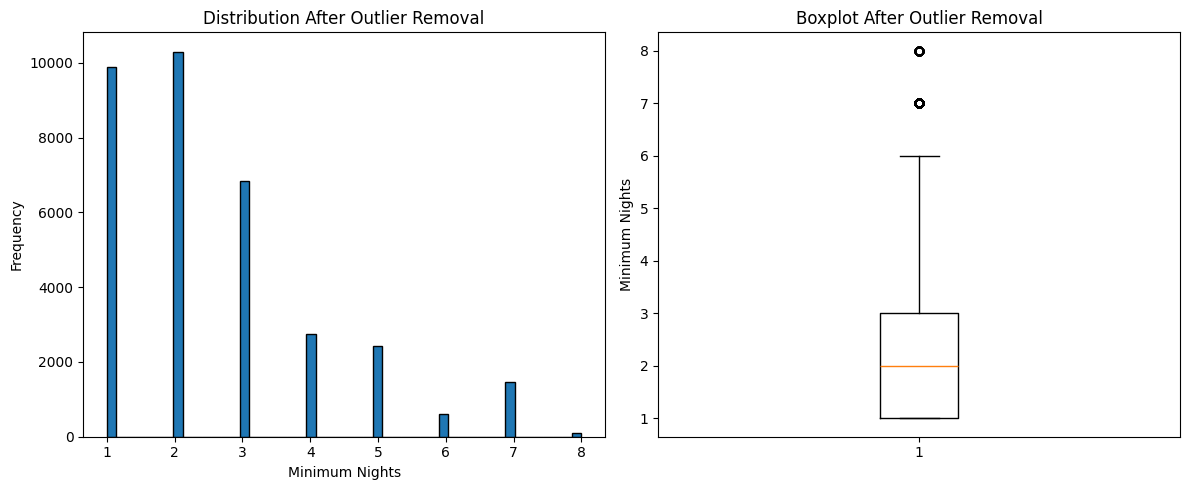

In [114]:
# put your answer here
# Apply IQR method
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['minimum_nights'] >= lower_bound) &
        (df['minimum_nights'] <= upper_bound)]

# After removal
print("\nAFTER outlier removal:")
print(df['minimum_nights'].describe())

# Visualize (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['minimum_nights'], bins=50, edgecolor='black')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution After Outlier Removal')

plt.subplot(1, 2, 2)
plt.boxplot(df['minimum_nights'])
plt.ylabel('Minimum Nights')
plt.title('Boxplot After Outlier Removal')

plt.tight_layout()
plt.show()

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [115]:
# put your answer here
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
df['review_rate_per_month'] = df['number_of_reviews'] * df['reviews_per_month']
df['is_expensive'] = df['price'] > 100

df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000,1.89,True
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.000000,17.10,True
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000,1252.80,False
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,66.666667,43.66,True
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,39.500000,1492.10,False
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,39.500000,116.82,False
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,150.000000,212.80,True
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,27.000000,22.79,True
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39,42.500000,282.00,False
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,22.250000,223.78,False


Create 1 aggregated summary table

(e.g. average price per neighborhood number of hosts per borough)

In [116]:
# put your answer here
df.groupby('neighbourhood_group')['price'].mean()

,price
neighbourhood_group,
Bronx,80.644231
Brooklyn,122.975183
Manhattan,178.558298
Queens,95.392273
Staten Island,90.126667


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [117]:
# put your answer here
# Remove all rows that violate any rule
def clean_data(df):
    print(f"Original rows: {len(df)}")

    # Apply all validation rules
    df_clean = df[
        (df['price'] > 0) &
        (df['host_id'].notnull()) &
        (df['minimum_nights'] >= 1)
    ]

    print(f"Clean rows: {len(df_clean)}")
    print(f"Rows removed: {len(df) - len(df_clean)}")
    print(f"Percentage retained: {(len(df_clean)/len(df))*100:.2f}%")

    return df_clean

df_clean = clean_data(df)

Original rows: 34359
Clean rows: 34351
Rows removed: 8
Percentage retained: 99.98%


## F. Publishing

Select final columns for publication.



In [118]:
# put your answer here
# Select and prepare columns for publication
def prepare_for_publication(df):
    """
    Select appropriate columns and prepare data for publication
    """

    # Define public columns
    public_columns = [
        'name',
        'neighbourhood',
        'neighbourhood_group',
        'latitude',
        'longitude',
        'room_type',
        'price',
        'minimum_nights',
        'number_of_reviews',
        'availability_365',
        'price_per_minimum_night',
        'review_rate_per_month',
        'is_expensive'
    ]

    # Select columns
    df_pub = df[public_columns].copy()

    return df_pub

df_published = prepare_for_publication(df)

print("Publication Dataset:")
print(df_published.info())
print("\nFirst 5 rows:")
print(df_published.head())

Publication Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 34359 entries, 0 to 48852
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     34359 non-null  object 
 1   neighbourhood            34359 non-null  object 
 2   neighbourhood_group      34359 non-null  object 
 3   latitude                 34359 non-null  float64
 4   longitude                34359 non-null  float64
 5   room_type                34359 non-null  object 
 6   price                    34359 non-null  int64  
 7   minimum_nights           34359 non-null  int64  
 8   number_of_reviews        34359 non-null  int64  
 9   availability_365         34359 non-null  int64  
 10  price_per_minimum_night  34359 non-null  float64
 11  review_rate_per_month    34359 non-null  float64
 12  is_expensive             34359 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 3.

Export cleaned dataset as "cleaned_airbnb.csv"

In [119]:
# put your answer here
df_clean.to_csv('cleaned_airbnb.csv', index=False)

Export summary reports (e.g., validation or aggregations) as CSV.

In [120]:
# put your answer here
# Report 1: Basic Statistical Summary
summary_stats = df.describe()
summary_stats.to_csv('summary_statistics.csv')
print("✓ Exported: summary_statistics.csv")

# Report 2: Data Info Summary (custom format)
info_data = {
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Unique_Values': [df[col].nunique() for col in df.columns]
}
info_report = pd.DataFrame(info_data)
info_report.to_csv('data_info_report.csv', index=False)
print("✓ Exported: data_info_report.csv")

# Report 3: Missing Values Report
missing_report = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Total_Rows': len(df)
})
missing_report = missing_report.sort_values('Missing_Count', ascending=False)
missing_report.to_csv('missing_values_report.csv', index=False)
print("✓ Exported: missing_values_report.csv")

✓ Exported: summary_statistics.csv
✓ Exported: data_info_report.csv
✓ Exported: missing_values_report.csv
